## kNN

### Что такое алгоритм kNN?

Начнем с введения некоторых определений и обозначений.

* Мы будем использовать $x$ для обозначения вектора признаков (или атрибутов) объекта.
* Под $y$ мы будем подразумевать метку или класс, который мы пытаемся предсказать.

KNN входит в число **supervised** алгоритмов или алгоритмов "обучения с учителем".
Это означает, что нам предоставляется размеченный набор данных, для которого известны соответствия между наблюдениями $(x, y)$. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, чтобы восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Обучение KNN заключается в запоминании экземпляров обучающей выборки, которые впоследствии используются как «знание» для фазы прогнозирования. Конкретно это означает, что только когда запрос в нашу базу данных сделан (т.е. когда мы просим KNN предсказать метку с учетом ввода), алгоритм будет использовать экземпляры обучения, чтобы выдать ответ.

Нужно понимать, что фаза обучения, заключающаяся в запоминании объектов выборки не является дорогостоящей по времени. Однако этого нельзя сказать о фазе тестирования. Если база обучения достаточно большая, осуществление поиска по ней достаточно дорогостоящий процесс.

### Как работает kNN?

В случае классификации алгоритм K-ближайших соседей по существу сводится к подсчету большинства голосов между K наиболее похожими экземплярами для данного тестового экземпляра. Сходство экземпляров определяется по расстоянию между двумя точками данных. Популярным выбором является евклидово расстояние, но также можно использовать другие меры близости в зависимости от ситуации.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)

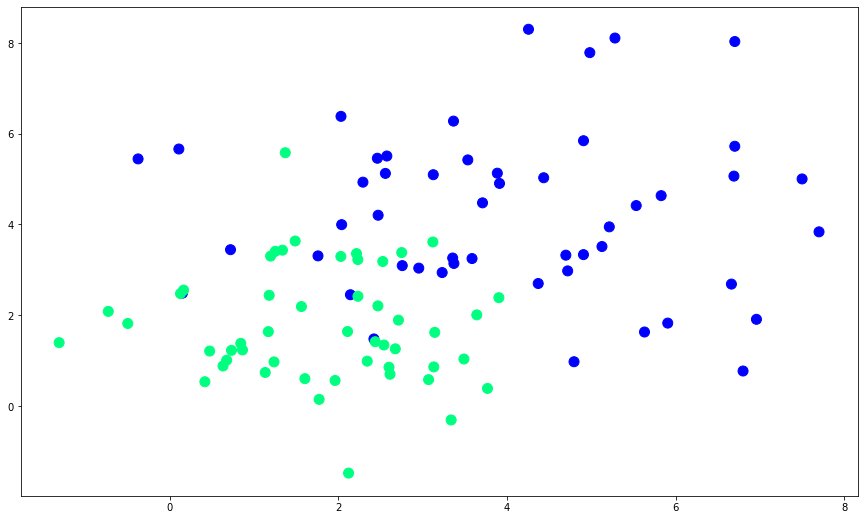

In [24]:
np.random.seed(13)
class0 = np.random.normal(4, 2, size=(50, 2))
class1 = np.random.normal(2, 1.5, size=(50, 2))
data = np.vstack((class0, class1))
target = np.hstack((np.zeros(len(class0)), np.ones(len(class1)))).astype(int)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap='winter')
plt.show()

In [25]:
!pip install mlxtend

In [26]:
from mlxtend.plotting import plot_decision_regions

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

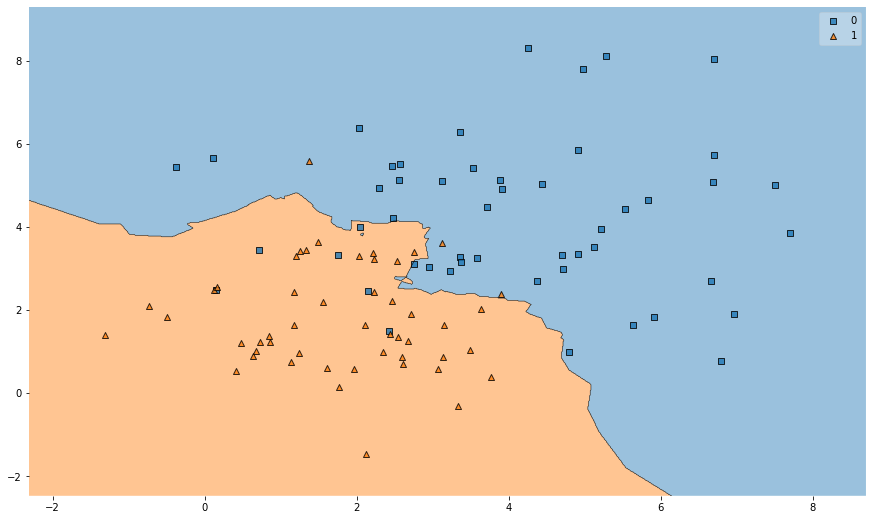

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=data, y=target, clf=knn)
plt.show()

Попробуем поменять параметр `n_neighbors` у классификатора kNN. Что получается, когда соседей очень мало? Когда очень много? Как меняется граница между классами?

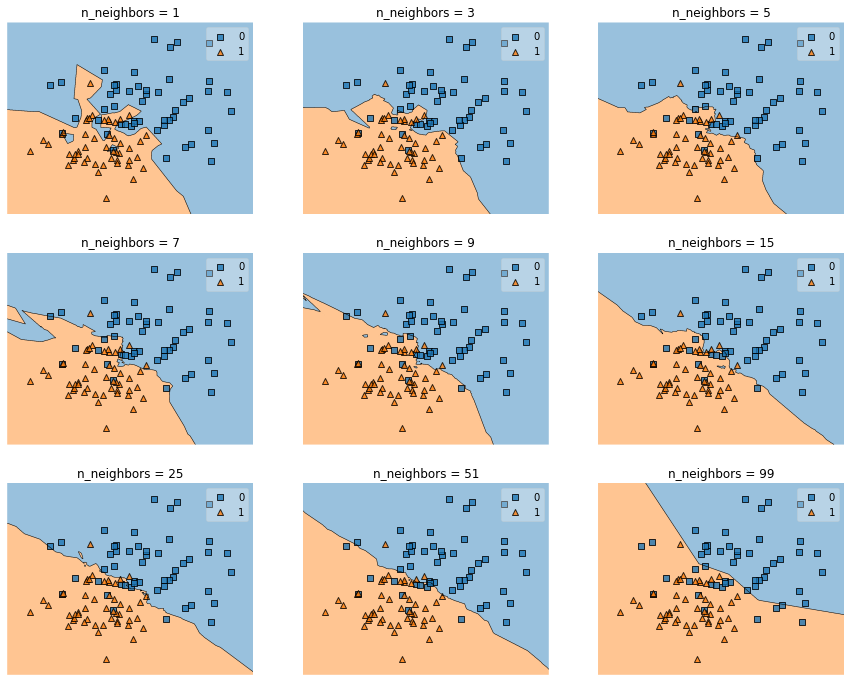

Wall time: 6min 9s


In [30]:
%%time

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, n_neighbors in enumerate([1, 3, 5, 7, 9, 15, 25, 51, 99]):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(data, target)
    ax_curr = ax[i // 3, i % 3]
    ax_curr.set_title('n_neighbors = {}'.format(n_neighbors))
    ax_curr.axis('off')
    plot_decision_regions(X=data, y=target, clf=knn, ax=ax_curr)
plt.show()

*Что произойдет, если выборка несбалансирована, а значение `n_neighors` равно числу объектов выборки?*

## Практика

Перейдем к применению kNN на практике с помощью библиотеки scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стала популярной засчет большого количества алгоритмов и простоты использования. Библиотека sklearn полезна для экспериментов, написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложения. В тоже время, для промышленных проектов она может не подходить ввиду неоптимизированного кода и выбранного языка.

Рассмотрим стандартный датасет c помощью функции `load_boston`. Датасет содержит информацию о ценах на квартиры и какие-то параметры квартиры: близость к реке, криминогенная обстановка в районе и т.д.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [5]:
X.shape, y.shape

((506, 13), (506,))

Посмотрим на наши данные. Давайте построим  график того, как цена зависит цена от криминогенной обстановки.

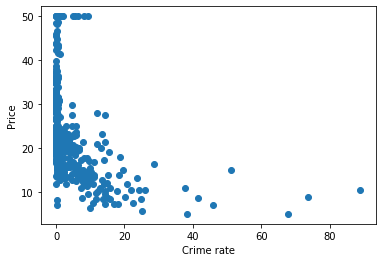

In [8]:
plt.scatter(X['CRIM'], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.show()

Как мы видим, дорогие квартиры находятся в районах с низким уровнем преступности. Что, в принципе, закономерно.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [11]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [12]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [13]:
predictions = knn.predict(X_test)

Отлично! Мы получили предсказания. Посчитаем метрику - соответствующая функция есть в scikit-learn. Будем считать среднеквадратичную ошибку, так как мы решаем задачу регрессии.

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

61.002850980392154

Давайте попробуем сделать лучше. У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [15]:
from sklearn.model_selection import GridSearchCV
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 40, 2),
        'weights': ['uniform', 'distance'],
        'p': [1, 2, 3]
    },
    cv=5
)

Параметр `cv=5` говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое: 

![alt text](https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png)

*Source: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85*

В нашем случае, выборка будет разделена на 5 частей, и на каждой из 5 итераций часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [16]:
%%time

grid_searcher.fit(X_train, y_train);

Wall time: 5.51 s


C:\Users\nikif\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Посмотрим на предсказание лучшей модели.

In [17]:
best_predictions = grid_searcher.predict(X_test)

In [18]:
mean_squared_error(y_test, best_predictions)

41.09086696843101

Давайте посмотрим на лучшие гиперпараметры, найденные по кросс-валидации.

In [19]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Давайте посмотрим на качество алгоритма в зависимости от количества соседей и от типа алгоритма (с разными весами и весами, обратно пропорциональными расстоянию). Качество будем оценивать с помощью кросс-валидации на обучающей выборке.

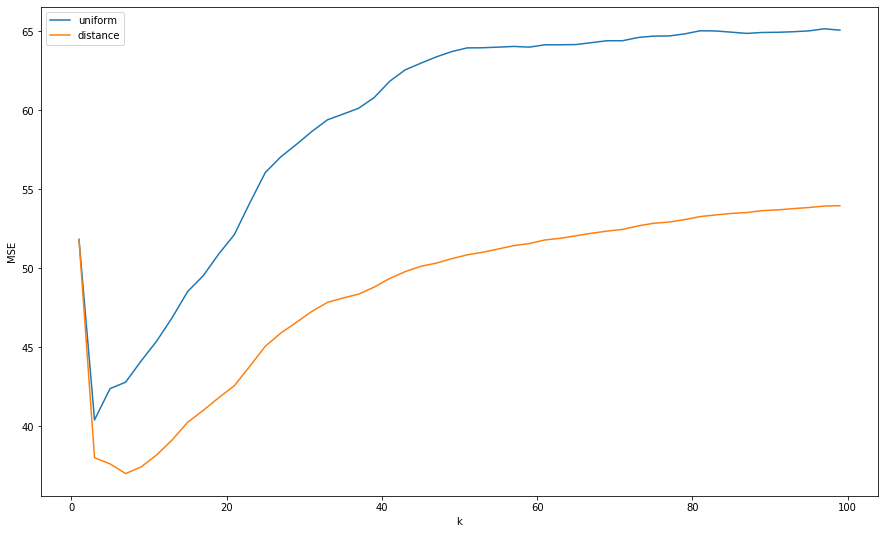

In [33]:
from sklearn.model_selection import cross_val_score

neighbors = np.arange(1, 101, 2)

scores_uni = []
scores_dis = []

for k in neighbors:
    knn_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn_distance = KNeighborsRegressor(n_neighbors=k, weights='distance')
    scores_uni.append(-cross_val_score(knn_uniform, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    scores_dis.append(-cross_val_score(knn_distance, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(neighbors, scores_uni, label='uniform')
plt.plot(neighbors, scores_dis, label='distance')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [34]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2)

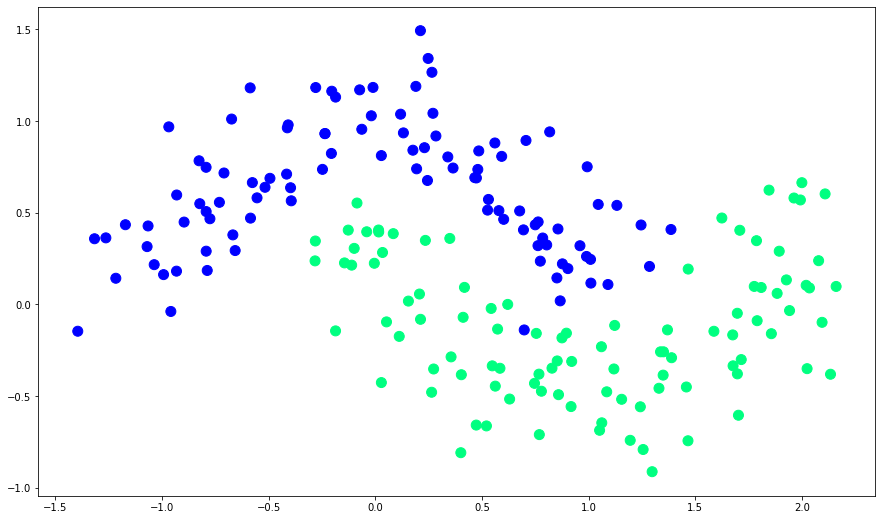

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='winter')
plt.show()

## Задания для самостоятельной работы.

1. https://nbviewer.jupyter.org/github/shestakoff/minor_da_2017/blob/master/colloc_knn.ipynb
2. Визуализируйте границу между классами для датасета `moons` для разного числа соседей и разных типов kNN (гиперпараметр `weights`). Как меняется граница в зависимости от числа соседей и типа алгоритма?
3. Влияет ли масштабирование на результат работы kNN? Примените два способа масштабирования к датасету `boston` - `MinMaxScaler` и `StandardScaler`. Как меняется качество алгоритма? Найдите оптимальные параметры.

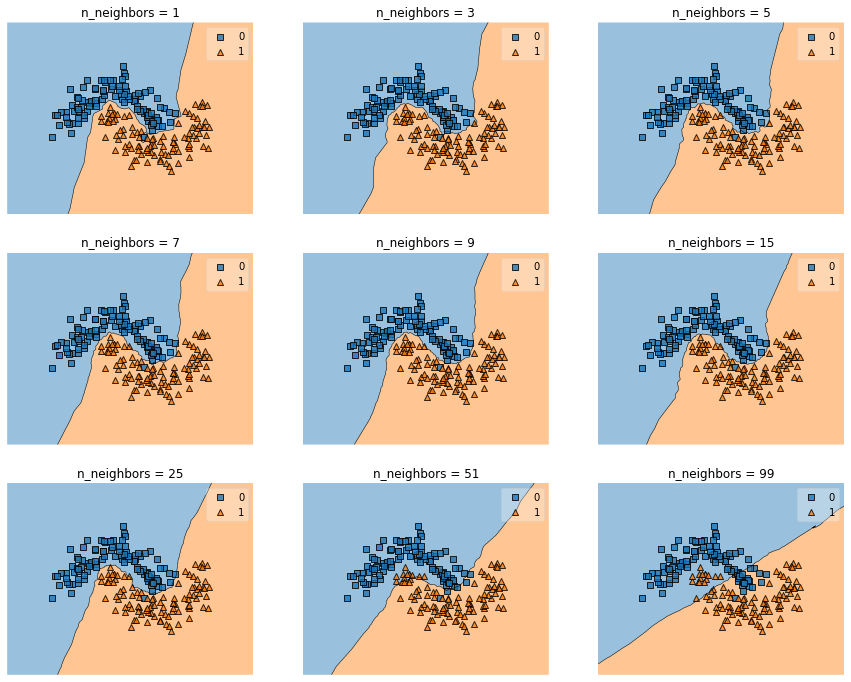

Wall time: 6min 32s


In [36]:
%%time

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, n_neighbors in enumerate([1, 3, 5, 7, 9, 15, 25, 51, 99]):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)
    ax_curr = ax[i // 3, i % 3]
    ax_curr.set_title('n_neighbors = {}'.format(n_neighbors))
    ax_curr.axis('off')
    plot_decision_regions(X=X, y=y, clf=knn, ax=ax_curr)
plt.show()